In [125]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [126]:
df = pd.read_csv("C:\\Datasets\\Xenophobic_tweets\\SA_XenoDataset_2017-2022.csv")

In [127]:
df.head()

,Unnamed: 0,DateCreated,TimeCreated,CleanedTweet,Sentiment,Likes,No of replies,Language,Retweets,User Location,Tweet Origin,Coordinates,District,Province,Number of Attacks
0,0,2022-07-18,20:57:33,Where are the foreigners? We were told maRus...,Negative,6,0,en,1,"Centurion, South Africa",Centurion,"longitude=28.0010585, latitude=-25.9448996",Rural,Gauteng,0
1,1,2022-07-18,20:15:58,We invite all those who have lost loved ones t...,Negative,3,2,en,0,"Johannesburg, South Africa",Johannesburg,"longitude=27.7518557, latitude=-26.5126489",Urban,Gauteng,0
2,2,2022-07-18,20:03:16,"After battling with HIV/AIDS for years, South ...",Negative,79,2,en,18,Planet Earth,Pretoria,"longitude=27.9483035, latitude=-25.9157727",Urban,Gauteng,0
3,3,2022-07-18,15:03:18,Nani impela seniyamthemba UCele nama phoyisa....,Negative,0,0,en,0,South Africa Nkandla e Hlwane,Johannesburg,"longitude=27.7518557, latitude=-26.5126489",Rural,Gauteng,0
4,4,2022-07-18,14:41:14,Give Nhlanhla his flowers for release himse...,Negative,0,1,en,0,Jozi,Johannesburg,"longitude=27.7518557, latitude=-26.5126489",Rural,Gauteng,0


In [128]:
df.drop(df.columns[:1],axis=1,inplace=True)

In [129]:
df.columns

Index(['DateCreated', 'TimeCreated', 'CleanedTweet', 'Sentiment', 'Likes',
       'No of replies', 'Language', 'Retweets', 'User Location',
       'Tweet Origin', 'Coordinates', 'District', 'Province',
       'Number of Attacks'],
      dtype='object')

In [130]:
df.DateCreated.head()

0    2022-07-18
1    2022-07-18
2    2022-07-18
3    2022-07-18
4    2022-07-18
Name: DateCreated, dtype: object

In [131]:
df.DateCreated.tail()
#The tweets have been collected for a period of 5 years

15907    2017-01-09
15908    2017-01-06
15909    2017-01-06
15910    2017-01-05
15911    2017-01-02
Name: DateCreated, dtype: object

In [132]:
df.TimeCreated.value_counts().head(10)

15:19:41    4
10:21:37    4
09:28:45    4
09:18:29    4
08:56:05    4
06:10:56    4
08:59:05    4
11:48:38    4
19:56:42    3
16:22:39    3
Name: TimeCreated, dtype: int64

In [133]:
df.isnull().sum()

DateCreated          0
TimeCreated          0
CleanedTweet         4
Sentiment            0
Likes                0
No of replies        0
Language             0
Retweets             0
User Location        0
Tweet Origin         0
Coordinates          3
District             0
Province             0
Number of Attacks    0
dtype: int64

In [134]:
df['CleanedTweet'] = df['CleanedTweet'].fillna('Missing')

In [135]:
# Length of tweets>
df['tweet_len'] = df['CleanedTweet'].apply(len)

In [136]:
df['tweet_len'].describe()

count    15912.000000
mean       163.067873
std         84.391469
min          1.000000
25%         90.000000
50%        159.000000
75%        248.000000
max        329.000000
Name: tweet_len, dtype: float64

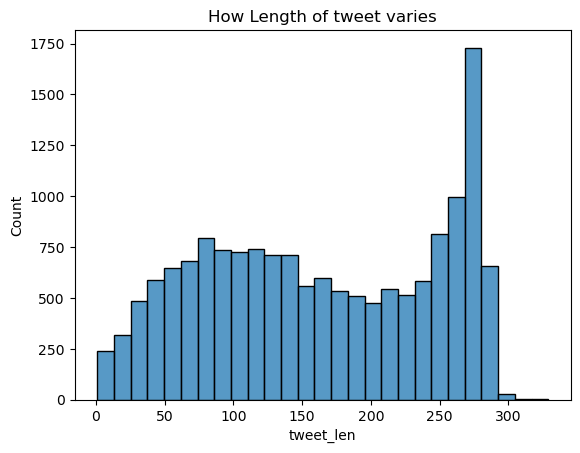

In [137]:
sns.histplot(x='tweet_len',data=df)
plt.title("How Length of tweet varies")
plt.show()

In [138]:
df.head()

,DateCreated,TimeCreated,CleanedTweet,Sentiment,Likes,No of replies,Language,Retweets,User Location,Tweet Origin,Coordinates,District,Province,Number of Attacks,tweet_len
0,2022-07-18,20:57:33,Where are the foreigners? We were told maRus...,Negative,6,0,en,1,"Centurion, South Africa",Centurion,"longitude=28.0010585, latitude=-25.9448996",Rural,Gauteng,0,104
1,2022-07-18,20:15:58,We invite all those who have lost loved ones t...,Negative,3,2,en,0,"Johannesburg, South Africa",Johannesburg,"longitude=27.7518557, latitude=-26.5126489",Urban,Gauteng,0,228
2,2022-07-18,20:03:16,"After battling with HIV/AIDS for years, South ...",Negative,79,2,en,18,Planet Earth,Pretoria,"longitude=27.9483035, latitude=-25.9157727",Urban,Gauteng,0,180
3,2022-07-18,15:03:18,Nani impela seniyamthemba UCele nama phoyisa....,Negative,0,0,en,0,South Africa Nkandla e Hlwane,Johannesburg,"longitude=27.7518557, latitude=-26.5126489",Rural,Gauteng,0,207
4,2022-07-18,14:41:14,Give Nhlanhla his flowers for release himse...,Negative,0,1,en,0,Jozi,Johannesburg,"longitude=27.7518557, latitude=-26.5126489",Rural,Gauteng,0,165


#  TWEET RELATIONSHIPS

Here I try to model the relationship between tweets and likes and try to geo locate hate sentiments

In [139]:
# First ,analysis of negative vs positive sentiments
df['Sentiment'].value_counts().head(40)
# A majority of the sentiments are positive

Negative      6320
Neutral       3099
negative      2623
Positive      1544
neutral       1051
positive       707
Neautral       130
POSITIVE        73
Positve         53
Negative        48
NEGATIVE        39
NEUTRAL         32
Nan             30
Positive        25
NAN             22
Neutral         11
neuatral         8
neutral          5
 Negative        4
negstive         3
negative'        3
Negattive        3
Nregative        3
Postive          3
Neagtive         2
Negatve          2
negatoive        2
 negative        2
Negtaive         2
Posiitive        2
  Positive       2
Neeutral         2
neagtive         2
negative         2
urban            2
 Neutral         2
negatiive        2
psoitive         2
Nun              2
NAn              2
Name: Sentiment, dtype: int64

In [140]:
df.head()

,DateCreated,TimeCreated,CleanedTweet,Sentiment,Likes,No of replies,Language,Retweets,User Location,Tweet Origin,Coordinates,District,Province,Number of Attacks,tweet_len
0,2022-07-18,20:57:33,Where are the foreigners? We were told maRus...,Negative,6,0,en,1,"Centurion, South Africa",Centurion,"longitude=28.0010585, latitude=-25.9448996",Rural,Gauteng,0,104
1,2022-07-18,20:15:58,We invite all those who have lost loved ones t...,Negative,3,2,en,0,"Johannesburg, South Africa",Johannesburg,"longitude=27.7518557, latitude=-26.5126489",Urban,Gauteng,0,228
2,2022-07-18,20:03:16,"After battling with HIV/AIDS for years, South ...",Negative,79,2,en,18,Planet Earth,Pretoria,"longitude=27.9483035, latitude=-25.9157727",Urban,Gauteng,0,180
3,2022-07-18,15:03:18,Nani impela seniyamthemba UCele nama phoyisa....,Negative,0,0,en,0,South Africa Nkandla e Hlwane,Johannesburg,"longitude=27.7518557, latitude=-26.5126489",Rural,Gauteng,0,207
4,2022-07-18,14:41:14,Give Nhlanhla his flowers for release himse...,Negative,0,1,en,0,Jozi,Johannesburg,"longitude=27.7518557, latitude=-26.5126489",Rural,Gauteng,0,165


In [141]:
df.Language.nunique()
# The tweets were written in a total of 32 languages

32

In [142]:
df['Tweet Origin'].value_counts().head(20)
# A lot of the tweets were made in Johannesburg

Johannesburg        2729
Pretoria            2173
Boksburg            1115
Sandton              915
Randburg             873
Soweto               862
Midrand              743
Durban               713
Roodepoort           624
Kempton Park         537
Centurion            530
Germiston            478
Tembisa              314
Brakpan              257
Saulsville           188
Diepkloof            188
Vosloorus            140
Akasia               127
Pietermaritzburg     126
Clayville            121
Name: Tweet Origin, dtype: int64

In [143]:
df['User Location'].value_counts().head(20)
# As was the case with the tweet origin , a lot of the users were from Johannesburg

Johannesburg, South Africa     1841
South Africa                   1707
Boksburg, South Africa         1498
Soweto, South Africa            701
Pretoria, South Africa          663
Johannesburg                    419
Republic of South Africa        386
Durban, South Africa            325
Sandton, South Africa           257
Bulawayo - Johannesburg         184
Pretoria                        159
Centurion, South Africa         148
Midrand, South Africa           138
Durban, North beach             124
Pretoria East, South Africa     121
Johannesburg,South Africa       111
Sowe2                           106
Worldwide                        97
Pretoria, GaMatlala, SA          95
Alberton, South Africa           93
Name: User Location, dtype: int64

<AxesSubplot:xlabel='Likes', ylabel='Count'>

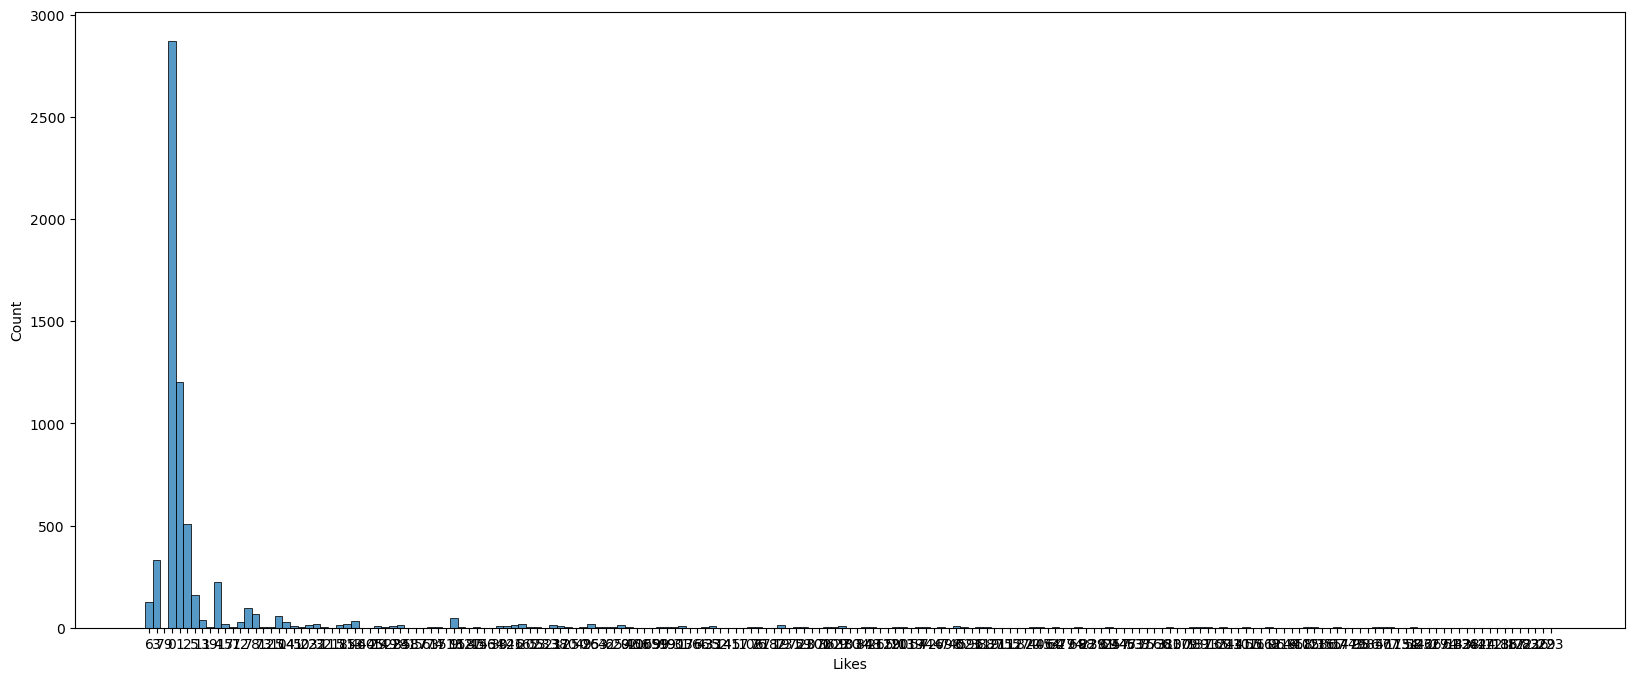

In [144]:
# How are the likes distributed in our case ?
x=df[df['Sentiment']=='Negative']['Likes']
plt.figure(figsize=(20,8))
sns.histplot(x)

In [145]:
corr = df.corr()

In [146]:
corr

,No of replies,Retweets,tweet_len
No of replies,1.000000,0.814057,0.057435
Retweets,0.814057,1.000000,0.057759
tweet_len,0.057435,0.057759,1.000000


In [147]:
df.dtypes

DateCreated          object
TimeCreated          object
CleanedTweet         object
Sentiment            object
Likes                object
No of replies         int64
Language             object
Retweets              int64
User Location        object
Tweet Origin         object
Coordinates          object
District             object
Province             object
Number of Attacks    object
tweet_len             int64
dtype: object

In [148]:
df.head()

,DateCreated,TimeCreated,CleanedTweet,Sentiment,Likes,No of replies,Language,Retweets,User Location,Tweet Origin,Coordinates,District,Province,Number of Attacks,tweet_len
0,2022-07-18,20:57:33,Where are the foreigners? We were told maRus...,Negative,6,0,en,1,"Centurion, South Africa",Centurion,"longitude=28.0010585, latitude=-25.9448996",Rural,Gauteng,0,104
1,2022-07-18,20:15:58,We invite all those who have lost loved ones t...,Negative,3,2,en,0,"Johannesburg, South Africa",Johannesburg,"longitude=27.7518557, latitude=-26.5126489",Urban,Gauteng,0,228
2,2022-07-18,20:03:16,"After battling with HIV/AIDS for years, South ...",Negative,79,2,en,18,Planet Earth,Pretoria,"longitude=27.9483035, latitude=-25.9157727",Urban,Gauteng,0,180
3,2022-07-18,15:03:18,Nani impela seniyamthemba UCele nama phoyisa....,Negative,0,0,en,0,South Africa Nkandla e Hlwane,Johannesburg,"longitude=27.7518557, latitude=-26.5126489",Rural,Gauteng,0,207
4,2022-07-18,14:41:14,Give Nhlanhla his flowers for release himse...,Negative,0,1,en,0,Jozi,Johannesburg,"longitude=27.7518557, latitude=-26.5126489",Rural,Gauteng,0,165


<AxesSubplot:xlabel='District', ylabel='count'>

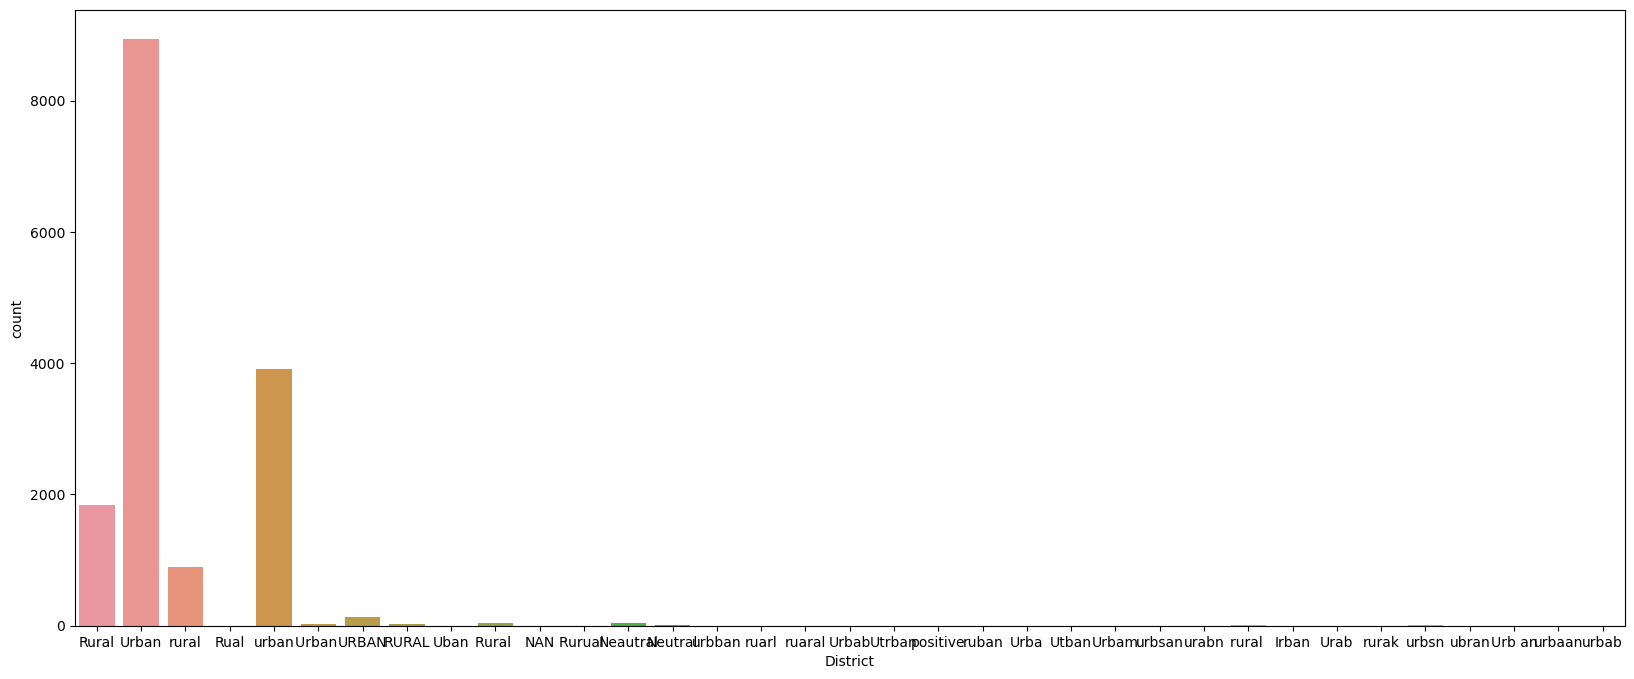

In [149]:
plt.figure(figsize=(20,8))
sns.countplot(x=df['District'])
# Majority of the tweets came from urban districs such as Pretoria and Johannesburg

In [150]:
df['Number of Attacks'].value_counts().head()

0     15548
1       268
2        53
20       16
5        13
Name: Number of Attacks, dtype: int64

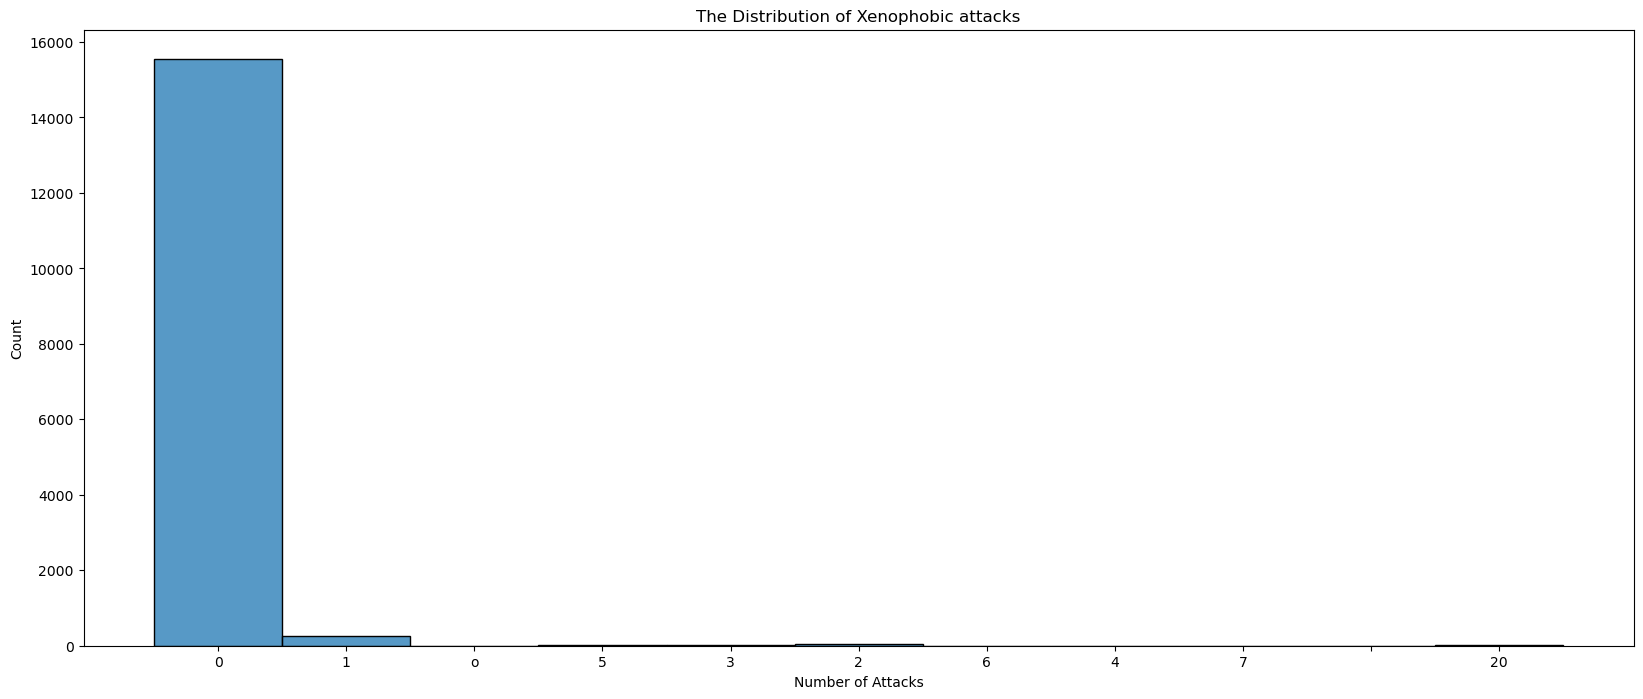

In [151]:
plt.figure(figsize=(20,8))
sns.histplot(x=df['Number of Attacks'])
plt.title("The Distribution of Xenophobic attacks")
plt.show()

<Figure size 2000x800 with 0 Axes>

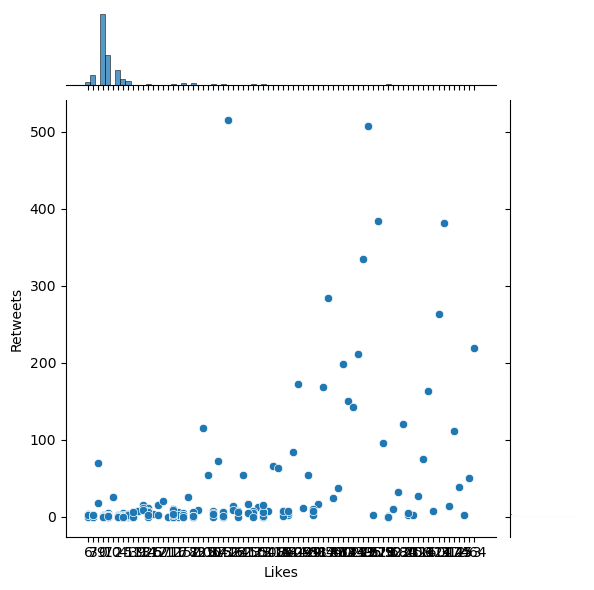

In [152]:
plt.figure(figsize=(20,8))
sns.jointplot(x='Likes',y='Retweets',data=df.head(1000))
plt.show()

<Figure size 2000x800 with 0 Axes>

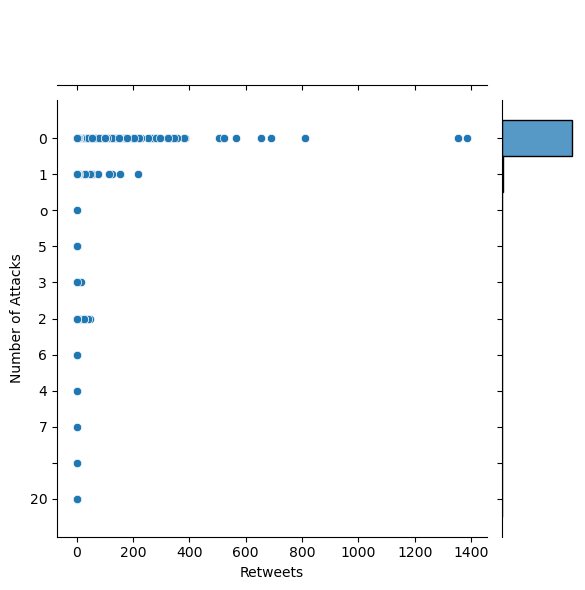

In [153]:
fig=plt.figure(figsize=(20,8))
sns.jointplot(y='Number of Attacks',x='Retweets',data=df)
plt.show()

In [154]:
df['Number of Attacks'].value_counts().head(20)

0     15548
1       268
2        53
20       16
5        13
3         8
6         2
o         1
4         1
7         1
          1
Name: Number of Attacks, dtype: int64

# PREDICTION OF NUMBER OF ATTACKS : USING ML AND DEEP LEARNING

In [155]:
df.head()

,DateCreated,TimeCreated,CleanedTweet,Sentiment,Likes,No of replies,Language,Retweets,User Location,Tweet Origin,Coordinates,District,Province,Number of Attacks,tweet_len
0,2022-07-18,20:57:33,Where are the foreigners? We were told maRus...,Negative,6,0,en,1,"Centurion, South Africa",Centurion,"longitude=28.0010585, latitude=-25.9448996",Rural,Gauteng,0,104
1,2022-07-18,20:15:58,We invite all those who have lost loved ones t...,Negative,3,2,en,0,"Johannesburg, South Africa",Johannesburg,"longitude=27.7518557, latitude=-26.5126489",Urban,Gauteng,0,228
2,2022-07-18,20:03:16,"After battling with HIV/AIDS for years, South ...",Negative,79,2,en,18,Planet Earth,Pretoria,"longitude=27.9483035, latitude=-25.9157727",Urban,Gauteng,0,180
3,2022-07-18,15:03:18,Nani impela seniyamthemba UCele nama phoyisa....,Negative,0,0,en,0,South Africa Nkandla e Hlwane,Johannesburg,"longitude=27.7518557, latitude=-26.5126489",Rural,Gauteng,0,207
4,2022-07-18,14:41:14,Give Nhlanhla his flowers for release himse...,Negative,0,1,en,0,Jozi,Johannesburg,"longitude=27.7518557, latitude=-26.5126489",Rural,Gauteng,0,165


In [156]:
cat_features = ['TimeCreated','Sentiment','Language','User Location','Tweet Origin','Coordinates','District','Province','Number of Attacks'
               ,'Likes']

In [157]:
from sklearn.preprocessing import LabelEncoder
lbl_encoder = {}

for features in cat_features:
    lbl_encoder = LabelEncoder()
    df[features] = lbl_encoder.fit_transform(df[features])

In [158]:
df.drop(['DateCreated'],axis=1,inplace=True)

In [159]:
df.head()

,TimeCreated,CleanedTweet,Sentiment,Likes,No of replies,Language,Retweets,User Location,Tweet Origin,Coordinates,District,Province,Number of Attacks,tweet_len
0,13488,Where are the foreigners? We were told maRus...,21,250,0,4,1,233,15,47,6,2,1,104
1,13062,We invite all those who have lost loved ones t...,21,148,2,4,0,630,43,14,16,2,1,228
2,12915,"After battling with HIV/AIDS for years, South ...",21,285,2,4,18,1034,86,38,16,2,1,180
3,9118,Nani impela seniyamthemba UCele nama phoyisa....,21,1,0,4,0,1271,43,14,6,2,1,207
4,8873,Give Nhlanhla his flowers for release himse...,21,1,1,4,0,661,43,14,6,2,1,165


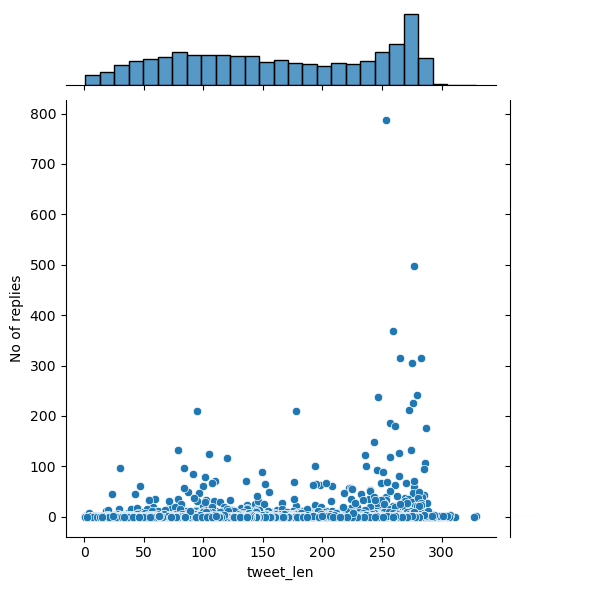

In [160]:
sns.jointplot(x=df.tweet_len , y=df['No of replies'])

In [161]:
df.corr()

,TimeCreated,Sentiment,Likes,No of replies,Language,Retweets,User Location,Tweet Origin,Coordinates,District,Province,Number of Attacks,tweet_len
TimeCreated,1.000000,-0.009290,0.001348,-0.015909,0.014023,-0.021043,-0.018825,0.005228,0.031308,0.010773,-0.002113,-0.025165,-0.044104
Sentiment,-0.009290,1.000000,-0.014692,0.002578,0.002478,0.003210,-0.022425,0.005107,-0.039104,0.586451,-0.012555,-0.012011,0.029598
Likes,0.001348,-0.014692,1.000000,0.119521,-0.018742,0.156268,-0.057850,-0.008582,0.016381,-0.010149,-0.006957,0.017574,0.097559
No of replies,-0.015909,0.002578,0.119521,1.000000,-0.013803,0.814057,0.019988,0.016512,-0.028794,-0.007596,-0.009250,0.002397,0.057435
Language,0.014023,0.002478,-0.018742,-0.013803,1.000000,-0.008769,0.042376,0.048889,-0.005052,-0.015092,0.016206,-0.001584,-0.241572
Retweets,-0.021043,0.003210,0.156268,0.814057,-0.008769,1.000000,0.007674,0.012195,-0.023540,-0.007460,-0.012802,0.001306,0.057759
User Location,-0.018825,-0.022425,-0.057850,0.019988,0.042376,0.007674,1.000000,0.280114,-0.156739,-0.033181,-0.047791,0.011987,-0.109288
Tweet Origin,0.005228,0.005107,-0.008582,0.016512,0.048889,0.012195,0.280114,1.000000,-0.258247,-0.024029,0.014580,0.013780,-0.087664
Coordinates,0.031308,-0.039104,0.016381,-0.028794,-0.005052,-0.023540,-0.156739,-0.258247,1.000000,-0.054710,0.435483,-0.004269,0.005632
District,0.010773,0.586451,-0.010149,-0.007596,-0.015092,-0.007460,-0.033181,-0.024029,-0.054710,1.000000,-0.068545,-0.012432,0.044076


In [162]:
df['CleanedTweet'].nunique()

15771

In [163]:
df.dtypes

TimeCreated           int32
CleanedTweet         object
Sentiment             int32
Likes                 int32
No of replies         int64
Language              int32
Retweets              int64
User Location         int32
Tweet Origin          int32
Coordinates           int32
District              int32
Province              int32
Number of Attacks     int32
tweet_len             int64
dtype: object

In [164]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import classification_report,mean_squared_error
from sklearn.model_selection import train_test_split
import torch
from torch import nn
import torch.nn.functional as F

In [165]:
df.columns

Index(['TimeCreated', 'CleanedTweet', 'Sentiment', 'Likes', 'No of replies',
       'Language', 'Retweets', 'User Location', 'Tweet Origin', 'Coordinates',
       'District', 'Province', 'Number of Attacks', 'tweet_len'],
      dtype='object')

In [166]:
X  = df.drop(['CleanedTweet','Number of Attacks'],axis=1)
y = df['Number of Attacks']

In [167]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=101)

In [168]:
rfc = RandomForestRegressor()
rfc.fit(X_train,y_train)
forest_predictions = rfc.predict(X_test)
print(mean_squared_error(y_test,forest_predictions))

0.10227364121897582


In [169]:
dtr = DecisionTreeRegressor()
dtr.fit(X_train,y_train)
tree_predictions =dtr.predict(X_test)
print(mean_squared_error(y_test,tree_predictions))

0.17499214577442665


In [170]:
print(forest_predictions[:9])

[1.   1.   1.02 1.03 1.13 1.   1.   1.02 1.05]


In [171]:
print(np.round(tree_predictions[:80]))

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 2. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1.]


# DEEP LEARNING

In [172]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [173]:
X = X.values

In [174]:
y = y.values.reshape(-1,1)

In [175]:
X

array([[13488,    21,   250, ...,     6,     2,   104],
       [13062,    21,   148, ...,    16,     2,   228],
       [12915,    21,   285, ...,    16,     2,   180],
       ...,
       [ 5397,    59,     2, ...,    31,     2,   113],
       [ 3043,    59,    99, ...,    31,     3,   111],
       [ 5302,    59,     1, ...,    25,     2,   137]], dtype=int64)

In [176]:
y

array([[1],
       [1],
       [1],
       ...,
       [1],
       [1],
       [1]])

In [177]:
X = scaler.fit_transform(X)

In [178]:
X.shape

(15912, 12)

In [179]:
y = scaler.fit_transform(y)

In [180]:
X_trained,X_tested,y_trained,y_tested = train_test_split(X,y,test_size = 0.3,random_state=101)

In [181]:
#Convert our scaled data  to tensors
X_trained = torch.from_numpy(X_trained).type(torch.Tensor)
X_tested= torch.from_numpy (X_tested) .type(torch.Tensor)
y_trained = torch.from_numpy(y_trained).type(torch.Tensor)
y_tested = torch.from_numpy(y_tested).type(torch.Tensor)

In [182]:
type(X)

numpy.ndarray

In [183]:
# We build a model with 12 inputs and 1 output
 
class Xeno(nn.Module):
    def __init__(self,input_dim=12,hidden_dim =48,output_dim =1):
        super().__init__()
        self.linear_layer1 = nn.Linear(input_dim,hidden_dim)
        self.linear_layer2 = nn.Linear(hidden_dim,hidden_dim)
        self.linear_layer3 = nn.Linear(hidden_dim,hidden_dim)
        self.out = nn.Linear(hidden_dim,output_dim)
    def forward(self,x):
        x = F.relu(x)
        x = self.linear_layer1(x)
        x = self.linear_layer2(x)
        x = self.linear_layer3(x)
        x = self.out(x)
        return x


In [184]:
model = Xeno()


In [185]:
model.parameters

<bound method Module.parameters of Xeno(
  (linear_layer1): Linear(in_features=12, out_features=48, bias=True)
  (linear_layer2): Linear(in_features=48, out_features=48, bias=True)
  (linear_layer3): Linear(in_features=48, out_features=48, bias=True)
  (out): Linear(in_features=48, out_features=1, bias=True)
)>

In [186]:
with torch.inference_mode():
 predictions= scaler.inverse_transform(model.forward(X_trained).detach().numpy())
 print(predictions)

[[0.28475767]
 [0.33726758]
 [0.63255996]
 ...
 [0.53554225]
 [0.52420074]
 [0.50076705]]


In [195]:
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(),lr=0.01)

In [196]:
# Training and Testing loop
epochs  = 200
for epoch in range(epochs):
    y_pred = model.forward(X_trained)
    loss = criterion(y_trained,y_pred)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    with torch.inference_mode():
        model.eval()
        y_pred = model.forward(X_tested)
        test_loss = criterion(y_tested,y_pred)
        if epoch % 10 == 0:
            print(f"The epoch is {epoch} the training loss is | {training_loss} and testing_loss is:{test_loss}")
        

The epoch is 0 the training loss is | 0.010521997697651386 and testing_loss is:0.0034221066161990166
The epoch is 10 the training loss is | 0.010521997697651386 and testing_loss is:0.0034646105486899614
The epoch is 20 the training loss is | 0.010521997697651386 and testing_loss is:0.001335378154180944
The epoch is 30 the training loss is | 0.010521997697651386 and testing_loss is:0.001234364346601069
The epoch is 40 the training loss is | 0.010521997697651386 and testing_loss is:0.0010775598930194974
The epoch is 50 the training loss is | 0.010521997697651386 and testing_loss is:0.0010201550321653485
The epoch is 60 the training loss is | 0.010521997697651386 and testing_loss is:0.001011821092106402
The epoch is 70 the training loss is | 0.010521997697651386 and testing_loss is:0.0010103549575433135
The epoch is 80 the training loss is | 0.010521997697651386 and testing_loss is:0.001009714906103909
The epoch is 90 the training loss is | 0.010521997697651386 and testing_loss is:0.00101

In [192]:
# THE END OF THE PROJECT : THANK YOU 